<img src="https://github.com/hernancontigiani/ceia_memorias_especializacion/raw/master/Figures/logoFIUBA.jpg" width="500" align="center">


# Procesamiento de lenguaje natural
## Custom embedddings con Gensim



### Objetivo
El objetivo es utilizar documentos / corpus para crear embeddings de palabras basado en ese contexto. Se utilizará canciones de bandas para generar los embeddings, es decir, que los vectores tendrán la forma en función de como esa banda haya utilizado las palabras en sus canciones.

In [2]:
!pip install --upgrade numpy==1.24.0
!pip install --upgrade --force-reinstall gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 98.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.24.0 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.0 which is incompatible.
blosc2 3.4.0 requires numpy>=1.26, but you have numpy 1.24.0 which is incompatible.
pymc 5.23.0 requires numpy>=1.25.0, but you have numpy 1.24.0 which is incompatible.
seaborn 0.13.2 requires numpy!=1.24.0,>=1.20, but you have numpy 1.24.0 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.24.0 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.24.0 which is inc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 73.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 96.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 kB 7.5 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninstalling wrapt-1.17.2:
      Successfully uninstalled wrapt-1.17.2
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.0
    Uninstalling numpy-1.24.0:
      Successfully uninstalled numpy-1.24.0
  Attempting uninstall: smart-open
    Found existing installation: smart-open 7.1.0
    Uninstalling smart-open-7.1.0:
      Successfully uninst

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import multiprocessing
from gensim.models import Word2Vec

### Datos
Utilizaremos como dataset canciones de bandas de habla inglesa.

In [ ]:
# Descargar la carpeta de dataset
import os
import platform
if os.access('./songs_dataset', os.F_OK) is False:
    if os.access('songs_dataset.zip', os.F_OK) is False:
        if platform.system() == 'Windows':
            !curl https://raw.githubusercontent.com/FIUBA-Posgrado-Inteligencia-Artificial/procesamiento_lenguaje_natural/main/datasets/songs_dataset.zip -o songs_dataset.zip
        else:
            !wget songs_dataset.zip https://github.com/FIUBA-Posgrado-Inteligencia-Artificial/procesamiento_lenguaje_natural/raw/main/datasets/songs_dataset.zip
    !unzip -q songs_dataset.zip
else:
    print("El dataset ya se encuentra descargado")

--2025-05-25 01:53:51--  http://songs_dataset.zip/
Resolving songs_dataset.zip (songs_dataset.zip)... failed: Name or service not known.
wget: unable to resolve host address ‘songs_dataset.zip’
--2025-05-25 01:53:51--  https://github.com/FIUBA-Posgrado-Inteligencia-Artificial/procesamiento_lenguaje_natural/raw/main/datasets/songs_dataset.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/FIUBA-Posgrado-Inteligencia-Artificial/procesamiento_lenguaje_natural/main/datasets/songs_dataset.zip [following]
--2025-05-25 01:53:51--  https://raw.githubusercontent.com/FIUBA-Posgrado-Inteligencia-Artificial/procesamiento_lenguaje_natural/main/datasets/songs_dataset.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.

In [ ]:
# Posibles bandas
os.listdir("./songs_dataset/")

['johnny-cash.txt',
 'lady-gaga.txt',
 'eminem.txt',
 'r-kelly.txt',
 'Lil_Wayne.txt',
 'lil-wayne.txt',
 'kanye.txt',
 'janisjoplin.txt',
 'paul-simon.txt',
 'Kanye_West.txt',
 'michael-jackson.txt',
 'rihanna.txt',
 'dolly-parton.txt',
 'joni-mitchell.txt',
 'amy-winehouse.txt',
 'bjork.txt',
 'missy-elliott.txt',
 'alicia-keys.txt',
 'prince.txt',
 'jimi-hendrix.txt',
 'dickinson.txt',
 'beatles.txt',
 'dj-khaled.txt',
 'leonard-cohen.txt',
 'lorde.txt',
 'bob-marley.txt',
 'bob-dylan.txt',
 'dr-seuss.txt',
 'bruno-mars.txt',
 'notorious-big.txt',
 'al-green.txt',
 'nirvana.txt',
 'patti-smith.txt',
 'kanye-west.txt',
 'ludacris.txt',
 'notorious_big.txt',
 'drake.txt',
 'adele.txt',
 'lin-manuel-miranda.txt',
 'bieber.txt',
 'nursery_rhymes.txt',
 'nicki-minaj.txt',
 'bruce-springsteen.txt',
 'nickelback.txt',
 'disney.txt',
 'britney-spears.txt',
 'cake.txt',
 'radiohead.txt',
 'blink-182.txt']

In [ ]:
# Armar el dataset utilizando salto de línea para separar las oraciones/docs
df = pd.read_csv('songs_dataset/beatles.txt', sep='/n', header=None)
df.head()

<ipython-input-4-91c4bad52ba1>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('songs_dataset/beatles.txt', sep='/n', header=None)


,0
0,"Yesterday, all my troubles seemed so far away"
1,Now it looks as though they're here to stay
2,"Oh, I believe in yesterday Suddenly, I'm not h..."
3,There's a shadow hanging over me.
4,"Oh, yesterday came suddenly Why she had to go ..."


In [ ]:
print("Cantidad de documentos:", df.shape[0])

Cantidad de documentos: 1846


### 1 - Preprocesamiento

In [ ]:
from tensorflow.keras.preprocessing.text import text_to_word_sequence

sentence_tokens = []
# Recorrer todas las filas y transformar las oraciones
# en una secuencia de palabras (esto podría realizarse con NLTK o spaCy también)
for _, row in df[:None].iterrows():
    sentence_tokens.append(text_to_word_sequence(row[0]))

In [ ]:
# Demos un vistazo
sentence_tokens[:2]

[['yesterday', 'all', 'my', 'troubles', 'seemed', 'so', 'far', 'away'],
 ['now', 'it', 'looks', 'as', 'though', "they're", 'here', 'to', 'stay']]

### 2 - Crear los vectores (word2vec)

In [ ]:
from gensim.models.callbacks import CallbackAny2Vec
# Durante el entrenamiento gensim por defecto no informa el "loss" en cada época
# Sobrecargamos el callback para poder tener esta información
class callback(CallbackAny2Vec):
    """
    Callback to print loss after each epoch
    """
    def __init__(self):
        self.epoch = 0

    def on_epoch_end(self, model):
        loss = model.get_latest_training_loss()
        if self.epoch == 0:
            print('Loss after epoch {}: {}'.format(self.epoch, loss))
        else:
            print('Loss after epoch {}: {}'.format(self.epoch, loss- self.loss_previous_step))
        self.epoch += 1
        self.loss_previous_step = loss

In [ ]:
# Crearmos el modelo generador de vectores
# En este caso utilizaremos la estructura modelo Skipgram
w2v_model = Word2Vec(min_count=5,    # frecuencia mínima de palabra para incluirla en el vocabulario
                     window=2,       # cant de palabras antes y desp de la predicha
                     vector_size=300,       # dimensionalidad de los vectores
                     negative=20,    # cantidad de negative samples... 0 es no se usa
                     workers=1,      # si tienen más cores pueden cambiar este valor
                     sg=1)           # modelo 0:CBOW  1:skipgram

In [ ]:
# Obtener el vocabulario con los tokens
w2v_model.build_vocab(sentence_tokens)

In [ ]:
# Cantidad de filas/docs encontradas en el corpus
print("Cantidad de docs en el corpus:", w2v_model.corpus_count)

Cantidad de docs en el corpus: 1846


In [ ]:
# Cantidad de words encontradas en el corpus
print("Cantidad de words distintas en el corpus:", len(w2v_model.wv.index_to_key))

Cantidad de words distintas en el corpus: 445


### 3 - Entrenar embeddings

In [17]:
# Entrenamos el modelo generador de vectores
# Utilizamos nuestro callback
w2v_model.train(sentence_tokens,
                 total_examples=w2v_model.corpus_count,
                 epochs=100,
                 compute_loss = True,
                 callbacks=[callback()]
                 )

Loss after epoch 0: 234719.609375
Loss after epoch 1: 223777.703125
Loss after epoch 2: 219639.9375
Loss after epoch 3: 216009.8125
Loss after epoch 4: 212712.5625
Loss after epoch 5: 214823.75
Loss after epoch 6: 208489.125
Loss after epoch 7: 207527.25
Loss after epoch 8: 196377.875
Loss after epoch 9: 198291.875
Loss after epoch 10: 176515.5
Loss after epoch 11: 173916.5
Loss after epoch 12: 172297.0
Loss after epoch 13: 179080.75
Loss after epoch 14: 169395.0
Loss after epoch 15: 175530.0
Loss after epoch 16: 175349.5
Loss after epoch 17: 173170.25
Loss after epoch 18: 172937.0
Loss after epoch 19: 163188.25
Loss after epoch 20: 163943.25
Loss after epoch 21: 168307.0
Loss after epoch 22: 153601.5
Loss after epoch 23: 145921.0
Loss after epoch 24: 146073.0
Loss after epoch 25: 143668.0
Loss after epoch 26: 182634.0
Loss after epoch 27: 145921.0
Loss after epoch 28: 150053.5
Loss after epoch 29: 152228.5
Loss after epoch 30: 180117.5
Loss after epoch 31: 180563.5
Loss after epoch 32

(5012713, 7867200)

### 4 - Ensayar

In [18]:
# Palabras que MÁS se relacionan con...:
w2v_model.wv.most_similar(positive=["darling"], topn=10)

[('boy', 0.5792440176010132),
 ('“dear', 0.560568630695343),
 ('pride', 0.5295901894569397),
 ('indefatigable', 0.5277661681175232),
 ('born', 0.5274312496185303),
 ('child', 0.5261365175247192),
 ('moritz', 0.5202217698097229),
 ('unhappy', 0.5184493660926819),
 ('“alas', 0.5093929767608643),
 ('“why', 0.5048097968101501)]

In [19]:
# Palabras que MENOS se relacionan con...:
w2v_model.wv.most_similar(negative=["love"], topn=10)

[('arrived', 0.1390155553817749),
 ('giving', 0.12716878950595856),
 ('beneath', 0.12363604456186295),
 ('hovel', 0.10982587188482285),
 ('at', 0.09615113586187363),
 ('white', 0.09509008377790451),
 ('proceeded', 0.09034094959497452),
 ('spent', 0.0831797793507576),
 ('performed', 0.08197586238384247),
 ('fatal', 0.07569104433059692)]

In [ ]:
# Palabras que MÁS se relacionan con...:
w2v_model.wv.most_similar(positive=["four"], topn=10)

[('five', 0.9786694049835205),
 ('three', 0.9761051535606384),
 ('six', 0.966891348361969),
 ('two', 0.9565720558166504),
 ('seven', 0.954232931137085),
 ('sixty', 0.9003373980522156),
 ('one', 0.816501259803772),
 ('us', 0.7762899398803711),
 ('crying', 0.772737979888916),
 ('strawberry', 0.7672452330589294)]

In [ ]:
# Palabras que MÁS se relacionan con...:
w2v_model.wv.most_similar(positive=["money"], topn=5)

[("can't", 0.9409592747688293),
 ('buy', 0.9399508237838745),
 ('much', 0.8996850848197937),
 ('hide', 0.8465201258659363),
 ('just', 0.8415144085884094)]

In [ ]:
# Ensayar con una palabra que no está en el vocabulario:
w2v_model.wv.most_similar(negative=["diedaa"])

KeyError: "Key 'diedaa' not present in vocabulary"

In [ ]:
# el método `get_vector` permite obtener los vectores:
vector_love = w2v_model.wv.get_vector("love")
print(vector_love)

[ 0.17736822  0.21460655 -0.05408018  0.06707036  0.13059464 -0.25713933
  0.00711611  0.26743424 -0.03100746  0.259963    0.21179457 -0.08465387
 -0.26272097  0.308386   -0.07934437 -0.13357355  0.2994755   0.18062147
 -0.13111673 -0.11857472  0.03468326  0.1125607   0.08478875  0.08090881
 -0.17622267  0.03122034 -0.08725598  0.23746666 -0.11507358 -0.29119617
 -0.03650665 -0.3322312   0.23262788  0.10366543 -0.18365337  0.08299578
  0.14315338 -0.19761457 -0.00757894  0.1119568  -0.10421463 -0.13083619
 -0.03264419 -0.04687435  0.11330808  0.10231452 -0.16202034 -0.10347028
  0.03659901 -0.08524423 -0.34872082 -0.02154255  0.25938764  0.16540806
  0.0310861   0.09505633  0.24452917 -0.09859891  0.18298703  0.0645447
  0.016967   -0.3259168  -0.04774074 -0.05418535 -0.04338397 -0.09137302
  0.00889874  0.11636022 -0.25662988  0.05426472  0.08915784  0.04541444
  0.20835714 -0.19101828  0.32210803  0.19337991  0.09080223 -0.00362429
 -0.18664253 -0.07053486 -0.1213743  -0.03477469 -0.

In [ ]:
# el método `most_similar` también permite comparar a partir de vectores
w2v_model.wv.most_similar(vector_love)

[('love', 1.0),
 ('babe', 0.9132986068725586),
 ('someone', 0.8914992809295654),
 ('nothing', 0.8811879754066467),
 ('need', 0.8758756518363953),
 ("didn't", 0.8689683079719543),
 ("there's", 0.8557919859886169),
 ('you', 0.8447725772857666),
 ('feed', 0.8422104716300964),
 ('somebody', 0.8385539054870605)]

In [ ]:
# Palabras que MÁS se relacionan con...:
w2v_model.wv.most_similar(positive=["love"], topn=10)

[('babe', 0.9132986068725586),
 ('someone', 0.8914992809295654),
 ('nothing', 0.8811879754066467),
 ('need', 0.8758756518363953),
 ("didn't", 0.8689682483673096),
 ("there's", 0.8557919859886169),
 ('you', 0.8447725772857666),
 ('feed', 0.8422104716300964),
 ('somebody', 0.8385538458824158),
 ('hope', 0.8361446261405945)]

### 5 - Visualizar agrupación de vectores

In [ ]:
from sklearn.decomposition import IncrementalPCA
from sklearn.manifold import TSNE
import numpy as np

def reduce_dimensions(model, num_dimensions = 2 ):

    vectors = np.asarray(model.wv.vectors)
    labels = np.asarray(model.wv.index_to_key)

    tsne = TSNE(n_components=num_dimensions, random_state=0)
    vectors = tsne.fit_transform(vectors)

    return vectors, labels

In [ ]:
# Graficar los embedddings en 2D
import plotly.graph_objects as go
import plotly.express as px

vecs, labels = reduce_dimensions(w2v_model)

MAX_WORDS=200
fig = px.scatter(x=vecs[:MAX_WORDS,0], y=vecs[:MAX_WORDS,1], text=labels[:MAX_WORDS])
fig.show(renderer="colab") # esto para plotly en colab

In [ ]:
# Graficar los embedddings en 3D

vecs, labels = reduce_dimensions(w2v_model,3)

fig = px.scatter_3d(x=vecs[:MAX_WORDS,0], y=vecs[:MAX_WORDS,1], z=vecs[:MAX_WORDS,2],text=labels[:MAX_WORDS])
fig.update_traces(marker_size = 2)
fig.show(renderer="colab") # esto para plotly en colab

In [ ]:
# También se pueden guardar los vectores y labels como tsv para graficar en
# http://projector.tensorflow.org/


vectors = np.asarray(w2v_model.wv.vectors)
labels = list(w2v_model.wv.index_to_key)

np.savetxt("vectors.tsv", vectors, delimiter="\t")

with open("labels.tsv", "w") as fp:
    for item in labels:
        fp.write("%s\n" % item)

### Alumno

- Crear sus propios vectores con Gensim basado en lo visto en clase con otro dataset.
- Probar términos de interés y explicar similitudes en el espacio de embeddings (sacar conclusiones entre palabras similitudes y diferencias).
- Graficarlos.
- Obtener conclusiones.

# Resolucion Desafio 2:

In [9]:
import os
import platform
import multiprocessing
from gensim.models import Word2Vec

# Descargar el dataset si no existe
if not os.path.exists("datasets_2"):
    if not os.path.exists("datasets.zip"):
        !wget -O datasets_2.zip https://github.com/Nico-Werner/ceia-procesamiento_del_lenguaje_natural/raw/main/datasets_2.zip
    !unzip -q datasets_2.zip
else:
    print("El dataset ya se encuentra descargado.")

# Listar archivos disponibles
print("Archivos disponibles en datasets:")
print(os.listdir("datasets"))

--2025-06-18 19:02:45--  https://github.com/Nico-Werner/ceia-procesamiento_del_lenguaje_natural/raw/main/datasets_2.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Nico-Werner/ceia-procesamiento_del_lenguaje_natural/main/datasets_2.zip [following]
--2025-06-18 19:02:45--  https://raw.githubusercontent.com/Nico-Werner/ceia-procesamiento_del_lenguaje_natural/main/datasets_2.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2561470 (2.4M) [application/zip]
Saving to: ‘datasets_2.zip’

datasets_2.zip      100%[===================>]   2.44M  --.-KB/s    in 0.1s    

2025-06-18 19:02:45 (24.6 MB

In [11]:
import pandas as pd
from tensorflow.keras.preprocessing.text import text_to_word_sequence


# Seleccionamos uno de los libros
archivo = "datasets/frankenstein.txt"

# Leemos el libro
with open(archivo, "r", encoding="utf-8") as f:
    oraciones = f.readlines()

print("Cantidad de oraciones:", len(oraciones))
print("Ejemplo de oración:", oraciones[0])

# Tokenizamos oraciones
sentence_tokens = []
for oracion in oraciones:
    tokens = text_to_word_sequence(oracion)
    if tokens:  # evitar oraciones vacías
        sentence_tokens.append(tokens)

print("Ejemplo de tokens:", sentence_tokens[0])

Cantidad de oraciones: 7736
Ejemplo de oración: The Project Gutenberg eBook of Frankenstein; Or, The Modern Prometheus

Ejemplo de tokens: ['the', 'project', 'gutenberg', 'ebook', 'of', 'frankenstein', 'or', 'the', 'modern', 'prometheus']


In [20]:
from gensim.models import Word2Vec
from gensim.models.callbacks import CallbackAny2Vec

# Callback para mostrar el loss por época
class callback(CallbackAny2Vec):
    def __init__(self):
        self.epoch = 0
    def on_epoch_end(self, model):
        loss = model.get_latest_training_loss()
        if self.epoch == 0:
            print('Loss after epoch {}: {}'.format(self.epoch, loss))
        else:
            print('Loss after epoch {}: {}'.format(self.epoch, loss- self.loss_previous_step))
        self.epoch += 1
        self.loss_previous_step = loss

# Creamos el modelo a usar
w2v_model = Word2Vec(
    min_count=3,
    window=3,
    vector_size=100,
    negative=10,
    workers=2,
    sg=1
)

w2v_model.build_vocab(sentence_tokens)
print("Cantidad de documentos en el corpus:", w2v_model.corpus_count)
print("Cantidad de palabras distintas:", len(w2v_model.wv.index_to_key))

# Entrenamiento
w2v_model.train(
    sentence_tokens,
    total_examples=w2v_model.corpus_count,
    epochs=100,
    compute_loss=True,
    callbacks=[callback()]
)

Cantidad de documentos en el corpus: 6729
Cantidad de palabras distintas: 3070
Loss after epoch 0: 378317.59375
Loss after epoch 1: 273142.46875
Loss after epoch 2: 252759.8125
Loss after epoch 3: 323622.5
Loss after epoch 4: 257685.125
Loss after epoch 5: 249607.5
Loss after epoch 6: 312928.125
Loss after epoch 7: 215432.375
Loss after epoch 8: 203424.75
Loss after epoch 9: 254024.25
Loss after epoch 10: 209696.75
Loss after epoch 11: 197669.0
Loss after epoch 12: 195523.25
Loss after epoch 13: 203219.5
Loss after epoch 14: 187283.75
Loss after epoch 15: 189735.5
Loss after epoch 16: 186187.75
Loss after epoch 17: 175429.5
Loss after epoch 18: 203982.0
Loss after epoch 19: 169743.0
Loss after epoch 20: 159163.5
Loss after epoch 21: 157455.0
Loss after epoch 22: 154498.0
Loss after epoch 23: 157394.0
Loss after epoch 24: 162705.0
Loss after epoch 25: 162612.0
Loss after epoch 26: 152871.0
Loss after epoch 27: 160808.5
Loss after epoch 28: 159713.5
Loss after epoch 29: 151362.5
Loss aft

(5012906, 7867200)

Lo dejamos en 100 epocas ya que pdemos ver que desde la 60 el loss se mueve entre 11 y 13

In [21]:
words_of_interest = ["frankenstein", "monster", "life", "death", "science", "love", "fear", "creation", "man", "woman"]

for word in words_of_interest:
    if word in w2v_model.wv:
        print(f"\nPalabras más similares a '{word}':")
        similars = w2v_model.wv.most_similar(word, topn=5)
        for similar_word, similarity in similars:
            print(f"  {similar_word} (similitud: {similarity:.3f})")
    else:
        print(f"\n'{word}' no está en el vocabulario del modelo.")


Palabras más similares a 'frankenstein':
  remind (similitud: 0.513)
  farewell (similitud: 0.499)
  prometheus (similitud: 0.489)
  “is (similitud: 0.449)
  hers (similitud: 0.448)

Palabras más similares a 'monster':
  seize (similitud: 0.558)
  executed (similitud: 0.537)
  apparition (similitud: 0.497)
  wretch (similitud: 0.482)
  dæmon (similitud: 0.477)

Palabras más similares a 'life':
  feelings (similitud: 0.455)
  foe (similitud: 0.394)
  lips (similitud: 0.393)
  dwelling (similitud: 0.390)
  dungeon (similitud: 0.380)

Palabras más similares a 'death':
  cruel (similitud: 0.475)
  rob (similitud: 0.457)
  poor (similitud: 0.453)
  entering (similitud: 0.446)
  midst (similitud: 0.435)

Palabras más similares a 'science':
  uses (similitud: 0.543)
  masters (similitud: 0.485)
  mathematics (similitud: 0.475)
  book (similitud: 0.473)
  lectures (similitud: 0.463)

Palabras más similares a 'love':
  tenderly (similitud: 0.576)
  murderer (similitud: 0.510)
  sympathise (sim

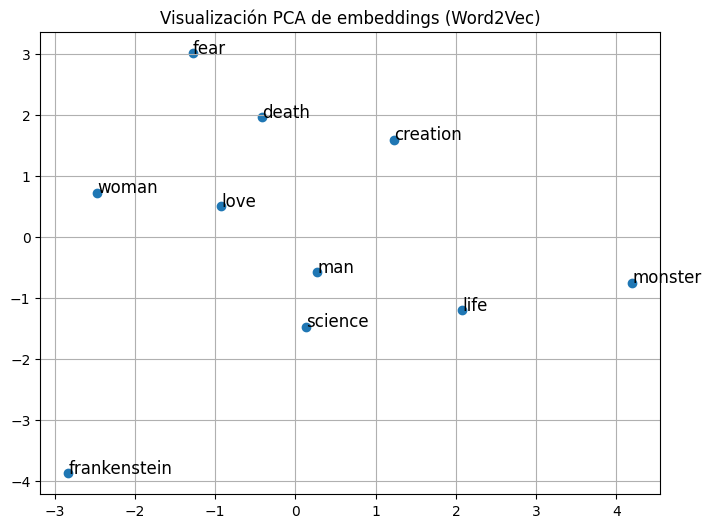

In [22]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

words_to_plot = [w for w in words_of_interest if w in w2v_model.wv]
word_vectors = [w2v_model.wv[w] for w in words_to_plot]

pca = PCA(n_components=2)
result = pca.fit_transform(word_vectors)

plt.figure(figsize=(8, 6))
plt.scatter(result[:, 0], result[:, 1])

for i, word in enumerate(words_to_plot):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]), fontsize=12)
plt.title("Visualización PCA de embeddings (Word2Vec)")
plt.grid(True)
plt.show()

### Conclusiones

- El modelo Word2Vec, entrenado sobre el libro "Frankenstein", logro captar relaciones semanticas interesantes entre los terminos seleccionados.
- Podemos ver que dentro del grafico de embeddings, palabras relacionadas en cierta forma, como "death" y "life", aparecen muy cerca, lo que muestra el peso de estos conceptos en el libro.
- Palabras como "man", "life", "science", "creation" y "monster" tambien tienden a agruparse, sugiriendo que el modelo identificó correctamente los tópicos principales del libro.
- Las similitudes encontradas refuerzan estas relaciones:  
  - "monster" es más similar a "daemon", "wretch", lo que coincide con algo negativo en general, pero ademas en el libro.
  - "love" se relaciona con palabras como "murderer" y "sympathise", mostrando como este es tomado dentro del libro.
- En conclusión, los embeddings muestra relacion semanticas que son bastante acordes a lo que es el libro en si, lo cual se pudo asociar correctamente.